# Education Project: Predicting ACT Scores based on Socio-Economic Factors
### Brisa Halviatti for Data 5100 Assignment 2


Project Overview
* Objective: The goal of this project is to predict ACT scores of students using socioeconomic data about the school, location, and enviornment
* Domain: Education
* Key Techniques: Regression Analysis

## Load and Preview Datasources

In [43]:
## import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as pg
po.init_notebook_mode(connected=True)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#set plotting style
sns.set_style('whitegrid')

EdGap Data

In [3]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx'
    ,dtype={'NCESSCH School ID': object})

C:\Users\brisa\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

School Info Data

In [11]:
school_info = pd.read_csv(r'C:\Users\brisa\Documents\0 Seattle U\DATA 5100 Foundations\education\data\ccd_sch_029_1617_w_1a_11212017.csv'
                         ,encoding='unicode_escape')

C:\Users\brisa\AppData\Local\Temp\ipykernel_22708\1003416712.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv(r'C:\Users\brisa\Documents\0 Seattle U\DATA 5100 Foundations\education\data\ccd_sch_029_1617_w_1a_11212017.csv'


In [12]:
pd.set_option('display.max_columns', None)
school_info.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  \
0  Alabama Youth Services               1    NaN   AL-210  100002   
1  Alabama Youth Services               1    NaN   AL-210  100002   
2  Alabama Youth Services               1    NaN   AL-210  100002   
3  Alabama Youth Services               1    NaN   AL-210  100002   
4  Alabama Youth Services               1    NaN   AL-210  100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No         

Higher Education Locations, by Zip Code

In [14]:
higher_ed_locations = pd.read_csv('https://github.com/brisamh/education/raw/refs/heads/main/data/hd2017.csv', encoding="unicode_escape")

In [15]:
higher_ed_locations.head()

UNITID                               INSTNM  \
0  100654             Alabama A & M University   
1  100663  University of Alabama at Birmingham   
2  100690                   Amridge University   
3  100706  University of Alabama in Huntsville   
4  100724             Alabama State University   

                                              IALIAS  \
0                                               AAMU   
1                                                      
2  Southern Christian University |Regions University   
3              UAH |University of Alabama Huntsville   
4                                                      

                             ADDR        CITY STABBR         ZIP  FIPS  \
0            4900 Meridian Street      Normal     AL       35762     1   
1  Administration Bldg Suite 1070  Birmingham     AL  35294-0110     1   
2                  1200 Taylor Rd  Montgomery     AL  36117-3553     1   
3                 301 Sparkman Dr  Huntsville     AL       35899     1   
4            915 S Jackson Street  Montgomery     AL  36104-0271     1   

   OBEREG                   CHFNM   CHFTITLE         GENTELE        EIN  \
0       5  Dr. Andrew Hugine, Jr.  President      2563725000  636001109   
1       5            Ray L. Watts  President      2059344011  636005396   
2       5        Michael C.Turner  President  33438738777528  237034324   
3       5    Robert A. Altenkirch  President      2568246120  630520830   
4       5         Quinton T. Ross  President      3342294100  636001101   

        DUNS     OPEID  OPEFLAG                    WEBADDR  \
0  197216455  00100200        1              www.aamu.edu/   
1  063690705  00105200        1                www.uab.edu   
2  126307792  02503400        1  www.amridgeuniversity.edu   
3  949687123  00105500        1                www.uah.edu   
4  040672685  00100500        1              www.alasu.edu   

                                        ADMINURL  \
0     www.aamu.edu/Admissions/Pages/default.aspx   
1  www.uab.edu/students/undergraduate-admissions   
2          www.amridgeuniversity.edu/admissions/   
3                 https://www.uah.edu/admissions   
4            www.alasu.edu/admissions/index.aspx   

                                             FAIDURL  \
0  www.aamu.edu/Admissions/fincialaid/Pages/defau...   
1            www.uab.edu/students/paying-for-college   
2            www.amridgeuniversity.edu/financialaid/   
3                                    finaid.uah.edu/   
4                  www.alasu.edu/cost-aid/index.aspx   

                                             APPLURL  \
0  https://ssb.aamu.edu/PROD/bwskalog.P_DispLoginNon   
1      https://idm.uab.edu/myuab/login?from=ugadmapp   
2  https://www2.amridgeuniversity.edu/Amridge/Log...   
3                                   register.uah.edu   
4  www.alasu.edu/admissions/undergrad-admissions/...   

                                            NPRICURL  \
0      www2.aamu.edu/scripts/netpricecalc/npcalc.htm   
1           uab.studentaidcalculator.com/survey.aspx   
2                   www2.amridgeuniversity.edu:9091/   
3                                    finaid.uah.edu/   
4  www.alasu.edu/cost-aid/forms/calculator/index....   

                                              VETURL  \
0                                                      
1                      www.uab.edu/students/veterans   
2     www.amridgeuniversity.edu/admissions/military/   
3  www.uah.edu/admissions/graduate/financial-aid/...   
4                                                      

                                              ATHURL  \
0  www.aamu.edu/administrativeoffices/irpsp/insti...   
1                     www.uab.edu/registrar/students   
2                                                      
3                                   www.uah.edu/heoa   
4            www.alasu.edu/search-results/index.aspx   

                                             DISAURL  SECTOR  ICLEVEL  \
0  www.aamu.edu/administr

CRDC Referrals to Law Enforcement and Arrest Data, by School

In [67]:
referrals_arrest = pd.read_csv('https://github.com/brisamh/education/raw/refs/heads/main/data/CRDC_Referrals_Arrests.csv', encoding="unicode_escape")

C:\Users\brisa\AppData\Local\Temp\ipykernel_22708\1401021889.py:1: DtypeWarning:

Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [17]:
referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                      -9   
1      McNeel Sch - Vacca Campus  10000201706  Yes                      -9   
2         Alabama Youth Services  10000201876   No                       0   
3                 AUTAUGA CAMPUS  10000299995  Yes                      -9   
4      Albertville Middle School  10000500870   No                       0   

   SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  SCH_DISCWODIS_REF_AM_F  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  SCH_DISCWODIS_REF_HP_M  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_HP_F  SCH_DISCWODIS_REF_BL_M  SCH_DISCWODIS_REF_BL_F  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_WH_M  SCH_DISCWODIS_REF_WH_F  SCH_DISCWODIS_REF_TR_M  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_TR_F  TOT_DISCWODIS_REF_M  TOT_DISCWODIS_REF_F  \
0                      -9                   -9                   -9   
1                      -9                   -9                   -9   
2                       0                    0                    0   
3                      -9                   -9                   -9   
4                       0                    0                    0   

   SCH_DISCWODIS_REF_LEP_M  SCH_DISCWODIS_REF_LEP_F  \
0                       -9                       -9   
1                       -9                       -9   
2                        0                        0   
3                       -9                       -9   
4                        0                        0   

   SCH_DISCWDIS_REF_IDEA_HI_M  SCH_DISCWDIS_REF_IDEA_HI_F  \
0                          -9                          -9   
1                          -9                          -9   
2                           0                           0   
3                          -9                          -9   
4                           0                           0   

   SCH_DISCWDIS_REF_IDEA_AM_M  SCH_DISCWDIS_REF_IDEA_AM_F  \
0                          -9                          -9   
1                  

## Data Cleaning, Preprocessing, and EDA

We will focus on the relationships between EdGap data and School Info, examine the data quality, perform any neccessary transformations, then join the data. Once we have a single data frame representing the combined data, we will continue with the remaining data sources one by one

In [18]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


EdGap data has some null values, data types look mostly correct, but we have data for fewer than 8k schools

In [19]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

School Info has more than 100k rows, location/identifying info is mostly non-null

School ID (NCESSCH) is a float here, but an object in the other dataset
* EdGap dataset does not contain all the schools 
* There are missing values in each
* each dataset is in a tidy/long format
* data types for the variables of interest look correct but mismatch types for the keys

### Begin EDA to visualize data before diving into pre-processing
The goal of this analysis is to run a regression analysis to determine the relationship between ACT scores and various predictors of socio-economic factors. We want to check those relationships before we spend too much time or energy on data that won't help our goal

We will use a pairplot to visualize all the relationships in the EdGap data, dropping School ID since it is not real data

<function matplotlib.pyplot.show(close=None, block=None)>

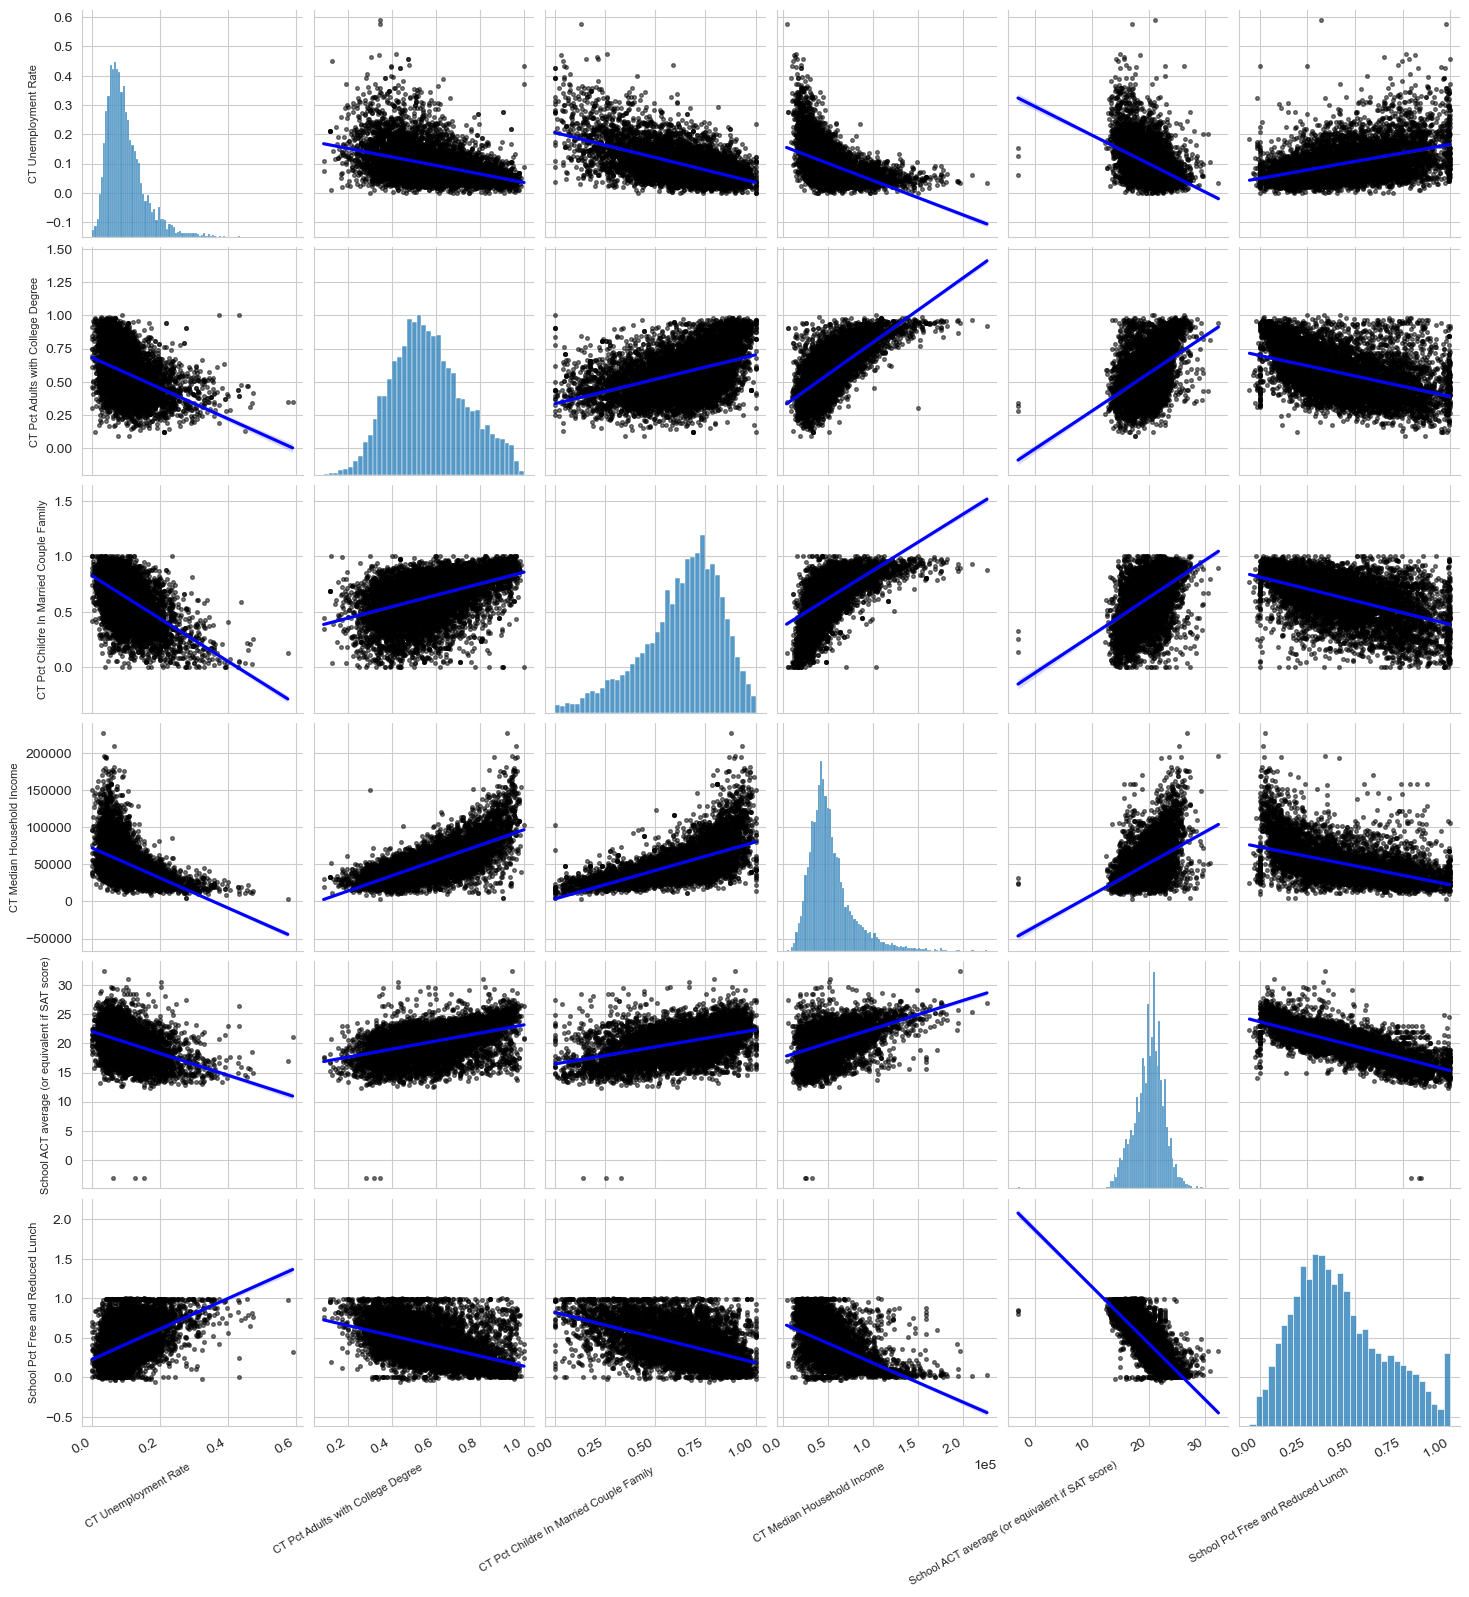

In [21]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    ,kind='reg' ## regression 
    ,plot_kws={
        "line_kws":{'color':'blue'},
        "scatter_kws":{"alpha":0.5,"color":"k","s":7},
        },
)

for ax in fig.axes.flat:
    if ax.get_xlabel()=='CT Median Household Income':
        ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0)) ## apply sci notation
    ax.set_xlabel(ax.get_xlabel(),fontsize=8, rotation=30, ha='right') ## x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(),fontsize=8) ## y axis label size
    
    ## rotate x axis tick labels
    plt.setp(ax.get_xticklabels(),rotation=30,ha='right')
plt.show
    
    

This is also a good opportunity for quality control: note that there are negative values in the ACT scores (does not pass sanity check). We have added regression lines by adding in kind='reg' 

Some preliminary indication of relationships between variables and ACT Scores, we can visualize more directly:

<function matplotlib.pyplot.show(close=None, block=None)>

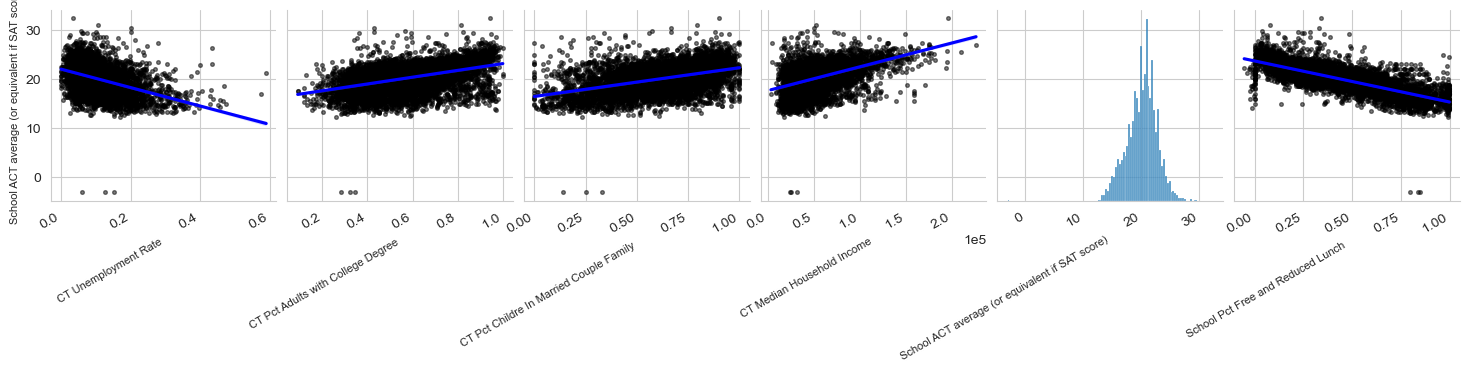

In [22]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    ## now we'll see a single row
    ,y_vars=['School ACT average (or equivalent if SAT score)']
    ,kind='reg' ## regression 
    ,plot_kws={
        "line_kws":{'color':'blue'},
        "scatter_kws":{"alpha":0.5,"color":"k","s":7},
        },
)

for ax in fig.axes.flat:
    if ax.get_xlabel()=='CT Median Household Income':
        ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0)) ## apply sci notation
    ax.set_xlabel(ax.get_xlabel(),fontsize=8, rotation=30, ha='right') ## x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(),fontsize=8) ## y axis label size
    
    ## rotate x axis tick labels
    plt.setp(ax.get_xticklabels(),rotation=30,ha='right')
plt.show
    
    

* there does appear to be a relationship between the socioeconomic variables and act scores
* there are some out of range ACT scores and percent lunch values that we need to address
* we shoul dhave confidence that it is worthwhile to spend time prepping this data

### Resume Data Pre-Processing
We will begin by selecting the relevant subsets of the data. School Info has many columns but we do not need them all

In [23]:
school_info = school_info[['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT','SCH_NAME','LEAID','SCHID']
                         ]

school_info.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT                          SCH_NAME   LEAID     SCHID  
0           No  Sequoyah Sch - Chalkville Campus  100002  100277.0  
1           No                             Camps  100002  101667.0  
2           No                           Det Ctr  100002  101670.0  
3           No     Wallace Sch - Mt Meigs Campus  100002  101705.0  
4           No         McNeel Sch - Vacca Campus  100002  101706.0

We will also rename columns in both datasets so they align better and can be joined easier

In [24]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID":'id'
        ,"CT Pct Adults with College Degree" : "percent_college"
        ,"CT Unemployment Rate" : 'rate_unemployment'
        ,"CT Pct Childre In Married Couple Family" : 'percent_married'
        ,"CT Median Household Income" : "median_income"
        ,"School ACT average (or equivalent if SAT score)" : "average_act"
        ,"School Pct Free and Reduced Lunch" : "percent_lunch"
    })


In [25]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [26]:
school_info = school_info.rename(
    columns={
        "SCHOOL_YEAR" : 'year'
        ,"NCESSCH" : 'id'
        ,"LSTATE" : 'state'
        ,"LZIP" : 'zipcode'
        ,"SCH_TYPE_TEXT" : 'school_type'
        ,"LEVEL" : 'school_level'
        ,"CHARTER_TEXT" : "charter"
        ,'SCH_NAME':'sch_name'
        ,'LEAID':'leaid'
        ,'SCHID':'schid'
    })

In [27]:
school_info.head()

year            id state zipcode         school_type school_level  \
0  2016-2017  1.000020e+10    AL   35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL   36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL   36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL   36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL   35206  Alternative School         High   

  charter                          sch_name   leaid     schid  
0      No  Sequoyah Sch - Chalkville Campus  100002  100277.0  
1      No                             Camps  100002  101667.0  
2      No                           Det Ctr  100002  101670.0  
3      No     Wallace Sch - Mt Meigs Campus  100002  101705.0  
4      No         McNeel Sch - Vacca Campus  100002  101706.0

### Join EdGap and School Info DataFrames
First step is to ensure our keys match

In [28]:
school_info['id'] = school_info['id'].astype('object')
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          102183 non-null  object 
 1   id            102181 non-null  object 
 2   state         102183 non-null  object 
 3   zipcode       102183 non-null  object 
 4   school_type   102181 non-null  object 
 5   school_level  102179 non-null  object 
 6   charter       102179 non-null  object 
 7   sch_name      102183 non-null  object 
 8   leaid         102183 non-null  object 
 9   schid         102181 non-null  float64
dtypes: float64(1), object(9)
memory usage: 7.8+ MB


Now we want to keep all the EdGap data, and bring in the school data where we have the data we care about, this will be a left join on the EdGap dataset

In [29]:
df = edgap.merge(
    school_info
    ,how='left'
    ,on='id')
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zipcode  \
0        42820.0    20.433455       0.066901  2016-2017    DE   19804   
1        89320.0    19.498168       0.112412  2016-2017    DE   19709   
2        84140.0    19.554335       0.096816  2016-2017    DE   19709   
3        56500.0    17.737485       0.296960  2016-2017    DE   19958   
4        54015.0    18.245421       0.262641  2016-2017    DE   19934   

      school_type school_level charter                   sch_name    leaid  \
0  Regular School         High     Yes  Delaware Military Academy  1000016   
1  Regular School         High      No     Middletown High School  1000080   
2  Regular School         High      No  Appoquinimink High School  1000080   
3  Regular School         High      No  Cape Henlopen High School  1000170   
4  Regular School         High      No  Caesar Rodney High School  1000180   

       schid  
0  1000143.0  
1  1000024.0  
2  1000225.0  
3  1000029.0  
4  1000040.0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zipcode            7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
 13  sch_name           7898 non-null   object 
 14  leaid              7898 non-null   object 
 15  schid              7898 non-null   float64
dtypes: float64(7), object(9)

#### Quality Control
Check the min and max values in each column, we know there are some natural bounds like percentages between 0-100 or ensuring only positive numbers exist 

In [31]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch         schid  
count  7986.000000    7986.000000  7.898000e+03  
mean     20.181532       0.420651  3.316423e+06  
std       2.595201       0.239754  1.323264e+06  
min      -3.070818      -0.054545  1.000024e+06  
25%      18.600000       0.238501  2.101487e+06  
50%      20.400000       0.381570  3.604479e+06  
75%      21.910867       0.575447  4.207507e+06  
max      32.362637       0.998729  5.600448e+06

In [32]:
df.select_dtypes(include=['number']).agg(['min','max']).round(2)
## selecting only the numerical data

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch      schid  
min        -3.07          -0.05  1000024.0  
max        32.36           1.00  5600448.0

There are some extreme values that are unlikely, and some that are impossible. The clearly incorrect values we'll set to NaN

In [33]:
df.loc[df['percent_lunch']<0,'percent_lunch']= np.nan
df.loc[df['average_act']<1,'average_act'] = np.nan

#### Checking Categorical Data
Start with missing values

In [34]:
df.isna().sum().to_frame(name='Number of Missing values')

Number of Missing values
id                                        0
rate_unemployment                        14
percent_college                          13
percent_married                          25
median_income                            20
average_act                               3
percent_lunch                            20
year                                     88
state                                    88
zipcode                                  88
school_type                              88
school_level                             88
charter                                  88
sch_name                                 88
leaid                                    88
schid                                    88

In [35]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.18
percent_college                      0.16
percent_married                      0.31
median_income                        0.25
average_act                          0.04
percent_lunch                        0.25
year                                 1.10
state                                1.10
zipcode                              1.10
school_type                          1.10
school_level                         1.10
charter                              1.10
sch_name                             1.10
leaid                                1.10
schid                                1.10

In [36]:
df['state'].value_counts()

state
TX    966
OH    693
PA    601
IL    590
MI    587
FL    441
NC    416
WI    386
NY    385
GA    383
NJ    354
MO    350
IN    347
TN    309
MA    292
WA    273
LA    245
KY    216
WY     38
DE     26
Name: count, dtype: int64

In [37]:
df['state'].nunique()

20

We can use plotly to visualize on a map where we have values, and what they are:

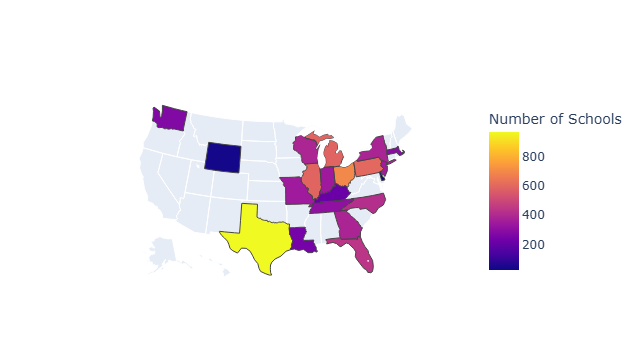

In [39]:
layout = dict(
    geo={"scope": "usa"},
    coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis"
)

x = pg.Figure(data=[data], layout=layout)
po.iplot(x)

We are missing a lot of data simply from omission. We're going to drop the rows where the average ACT score is missing, since that is what we are interested in and we don't have many missing values

In [40]:
df=df.dropna(subset=['average_act'])

In [41]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        14
percent_college                          13
percent_married                          25
median_income                            20
average_act                               0
percent_lunch                            20
year                                     88
state                                    88
zipcode                                  88
school_type                              88
school_level                             88
charter                                  88
sch_name                                 88
leaid                                    88
schid                                    88

If we were to drop rows that have NaNs for any socioeconomic variables, then we would negatively affect our analysis using the variables where the data was present. We will impute those rows based on relationships we see in the data

#### Data Imputation

In [42]:
predictor_variables = [
    'rate_unemployment'
    ,'percent_college'
    ,'percent_married'
    ,'median_income'
    ,'percent_lunch'
    ,'state'
    ,'charter'
]

We will use an interative imputer, what we're doing is using a type of regression analysis to look at relationships between predictors so if we're missing one i can use the best guess of it based on it's relationship to the other variables

In [44]:
imputer = IterativeImputer()

In [45]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

In [46]:
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fit the imputer with the data from those columns, here we are learning the relationships between thoes columns and then we can apply the transform method to actually replace the values

In [47]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [48]:
df.loc[:,numerical_predictors] = imputer.transform(df.loc[:,numerical_predictors])

In [49]:
df.isna().sum()

id                    0
rate_unemployment     0
percent_college       0
percent_married       0
median_income         0
average_act           0
percent_lunch         0
year                 88
state                88
zipcode              88
school_type          88
school_level         88
charter              88
sch_name             88
leaid                88
schid                88
dtype: int64

This concludes the pre-processing of our two key DataFrames, we will now move on to the remaining datasets

### Join Additional Data to Merged DataFrame

#### Higher Education Institutions by Zip Code
We will begin with the Higher Ed data, using the addresses of all the registered Higher Education Institutions we will discern a Y/N flag for Zip Codes (or School Districts if needed) with at least one Higher Ed institution in the region (Zip Code)

In [50]:
higher_ed_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153 entries, 0 to 7152
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UNITID    7153 non-null   int64  
 1   INSTNM    7153 non-null   object 
 2   IALIAS    7153 non-null   object 
 3   ADDR      7153 non-null   object 
 4   CITY      7153 non-null   object 
 5   STABBR    7153 non-null   object 
 6   ZIP       7153 non-null   object 
 7   FIPS      7153 non-null   int64  
 8   OBEREG    7153 non-null   int64  
 9   CHFNM     7153 non-null   object 
 10  CHFTITLE  7153 non-null   object 
 11  GENTELE   7153 non-null   object 
 12  EIN       7153 non-null   int64  
 13  DUNS      7153 non-null   object 
 14  OPEID     7153 non-null   object 
 15  OPEFLAG   7153 non-null   int64  
 16  WEBADDR   7153 non-null   object 
 17  ADMINURL  7153 non-null   object 
 18  FAIDURL   7153 non-null   object 
 19  APPLURL   7153 non-null   object 
 20  NPRICURL  7153 non-null   obje

In [51]:
## keep only relevant columns
higher_ed_locations = higher_ed_locations[['UNITID','INSTNM','ZIP','HLOFFER','INSTSIZE']]
## change column names
higher_ed_locations.columns = ['institute_id','institute_name','zipcode','max_credential','size']

In [52]:
## convert numerical codes into categories
max_credential_map = {
    0: 'Other',
    1: 'Certificate <1 year',
    2: 'Certificate 1-2 years',
    3: 'Associate’s degree',
    4: 'Certificate 2-4 years',
    5: 'Bachelor’s degree',
    6: 'Postbaccalaureate certificate',
    7: 'Master’s degree',
    8: 'Post-master’s certificate',
    9: 'Doctor’s degree',
    'b': 'None / No answer',
    -2: 'Not applicable (first-professional only)',
    -3: 'Not available'
}

size_map = {
    1: 'Under 1,000',
    2: '1,000–4,999',
    3: '5,000–9,999',
    4: '10,000–19,999',
    5: '20,000+',
    -1: 'Not reported',
    -2: 'Not applicable',
    -3: 'Not available'
}

higher_ed_locations['size_cat'] = higher_ed_locations['size'].map(size_map)

## remap the columns 
higher_ed_locations['max_cred_cat'] = higher_ed_locations['max_credential'].map(max_credential_map)

higher_ed_locations.head()

institute_id                       institute_name     zipcode  \
0        100654             Alabama A & M University       35762   
1        100663  University of Alabama at Birmingham  35294-0110   
2        100690                   Amridge University  36117-3553   
3        100706  University of Alabama in Huntsville       35899   
4        100724             Alabama State University  36104-0271   

   max_credential  size     size_cat     max_cred_cat  
0               9     3  5,000–9,999  Doctor’s degree  
1               9     5      20,000+  Doctor’s degree  
2               9     1  Under 1,000  Doctor’s degree  
3               9     3  5,000–9,999  Doctor’s degree  
4               9     2  1,000–4,999  Doctor’s degree

In [53]:
## Check if there are any codes missing
higher_ed_locations.loc[higher_ed_locations['size_cat'].isnull(), 'size'].unique()

array([], dtype=int64)

In [54]:
## Check if there are any codes missing
higher_ed_locations.loc[higher_ed_locations['max_cred_cat'].isnull(), 'max_credential'].unique()

array([], dtype=int64)

Start higher level, by just doing a count of institutiions regardless of size or credentials offered 

In [55]:
## Count the number of institutions, by size and max_credential, for each zip code
higher_ed_zip = (higher_ed_locations.groupby(['zipcode'])['institute_id'].nunique()).reset_index()
higher_ed_zip.columns = ['zipcode','institution_count']
higher_ed_zip.head()

zipcode  institution_count
0       00602                  2
1  00602-0960                  1
2       00603                  4
3  00604-6150                  1
4       00605                  1

In [56]:
## drop any hyper specific zip code location type
higher_ed_zip['zipcode'] = higher_ed_zip['zipcode'].str[:5]
higher_ed_zip.head()

zipcode  institution_count
0   00602                  2
1   00602                  1
2   00603                  4
3   00604                  1
4   00605                  1

In [57]:
## reaggregate 
higher_ed_zip = (higher_ed_zip.groupby(['zipcode'])['institution_count'].nunique()).reset_index()
higher_ed_zip.head()

zipcode  institution_count
0   00602                  2
1   00603                  1
2   00604                  1
3   00605                  1
4   00612                  1

In [61]:
higher_ed_zip['any_institutions'] = higher_ed_zip['institution_count'] > 0
higher_ed_zip.head()

zipcode  institution_count  any_institutions
0   00602                  2              True
1   00603                  1              True
2   00604                  1              True
3   00605                  1              True
4   00612                  1              True

#### Referrals and Arrest Data
CRDC “Referrals and Arrests” tracks disciplinary actions involving law enforcement. The fields you listed correspond to counts of students referred to law enforcement or subjected to school-related arrests, disaggregated by disability status, race/ethnicity, gender, and program type

Data Dictionary for assistance:

* CH_	School-level count (as opposed to district-level).
* DISCWODIS	“Discipline Without Disabilities” — applies to students not served under IDEA (Individuals with Disabilities Education Act).
* DISCWDIS	“Discipline With Disabilities” — applies to students served under IDEA or Section 504.
* REF	Referred to law enforcement (but not necessarily arrested).
* ARR	School-related arrest (formal arrest due to school discipline).
* IDEA	Students with disabilities served under the Individuals with Disabilities Education Act (special education).
* 504	Students with disabilities served under Section 504 of the Rehabilitation Act (not IDEA, but still have accommodations).
* LEP	Limited English Proficient students (English learners).
* TR	Two or more races (“TR” = “Two or more races”).
* WH	White students.
* HI	Hispanic/Latino students.
* M / F	Male / Female students.

In [62]:
pd.set_option('display.max_columns',None)
referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                      -9   
1      McNeel Sch - Vacca Campus  10000201706  Yes                      -9   
2         Alabama Youth Services  10000201876   No                       0   
3                 AUTAUGA CAMPUS  10000299995  Yes                      -9   
4      Albertville Middle School  10000500870   No                       0   

   SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  SCH_DISCWODIS_REF_AM_F  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  SCH_DISCWODIS_REF_HP_M  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_HP_F  SCH_DISCWODIS_REF_BL_M  SCH_DISCWODIS_REF_BL_F  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_WH_M  SCH_DISCWODIS_REF_WH_F  SCH_DISCWODIS_REF_TR_M  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_TR_F  TOT_DISCWODIS_REF_M  TOT_DISCWODIS_REF_F  \
0                      -9                   -9                   -9   
1                      -9                   -9                   -9   
2                       0                    0                    0   
3                      -9                   -9                   -9   
4                       0                    0                    0   

   SCH_DISCWODIS_REF_LEP_M  SCH_DISCWODIS_REF_LEP_F  \
0                       -9                       -9   
1                       -9                       -9   
2                        0                        0   
3                       -9                       -9   
4                        0                        0   

   SCH_DISCWDIS_REF_IDEA_HI_M  SCH_DISCWDIS_REF_IDEA_HI_F  \
0                          -9                          -9   
1                          -9                          -9   
2                           0                           0   
3                          -9                          -9   
4                           0                           0   

   SCH_DISCWDIS_REF_IDEA_AM_M  SCH_DISCWDIS_REF_IDEA_AM_F  \
0                          -9                          -9   
1                  

In [63]:
referrals_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97632 entries, 0 to 97631
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LEA_STATE                   97632 non-null  object
 1   LEA_STATE_NAME              97632 non-null  object
 2   LEAID                       97632 non-null  object
 3   LEA_NAME                    97632 non-null  object
 4   SCHID                       97632 non-null  int64 
 5   SCH_NAME                    97632 non-null  object
 6   COMBOKEY                    97632 non-null  object
 7   JJ                          97632 non-null  object
 8   SCH_DISCWODIS_REF_HI_M      97632 non-null  int64 
 9   SCH_DISCWODIS_REF_HI_F      97632 non-null  int64 
 10  SCH_DISCWODIS_REF_AM_M      97632 non-null  int64 
 11  SCH_DISCWODIS_REF_AM_F      97632 non-null  int64 
 12  SCH_DISCWODIS_REF_AS_M      97632 non-null  int64 
 13  SCH_DISCWODIS_REF_AS_F      97632 non-null  in

-9 is a code for missing or non reported data, so replace these with NaN

In [68]:
referrals_arrest['SCH_DISCWODIS_REF_HI_M'].unique()

array([ -9,   0,   1,   4,   2,   3,   6,   5,  10,   8,  14,  12,  11,
         7,   9,  13,  36,  -3,  22,  15,  26,  24,  27,  33,  37,  28,
        38,  32,  34,  50,  21,  18,  16,  31,  20,  25,  39,  17,  53,
        19,  47,  -5,  66,  23,  44,  29,  30,  90,  35,  81,  72,  45,
        80,  85,  77,  74,  65,  -6,  60,  56,  43,  94,  57,  41,  70,
        88,  62, 401, 161,  86,  84,  40, 156, 105, 102,  54])

In [69]:
## replace - values with nan
num_cols = referrals_arrest.select_dtypes(include=[np.number]).columns
referrals_arrest[num_cols] = referrals_arrest[num_cols].mask(referrals_arrest[num_cols]<0,np.nan)
referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                     NaN   
1      McNeel Sch - Vacca Campus  10000201706  Yes                     NaN   
2         Alabama Youth Services  10000201876   No                     0.0   
3                 AUTAUGA CAMPUS  10000299995  Yes                     NaN   
4      Albertville Middle School  10000500870   No                     0.0   

   SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  SCH_DISCWODIS_REF_AM_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  SCH_DISCWODIS_REF_HP_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_HP_F  SCH_DISCWODIS_REF_BL_M  SCH_DISCWODIS_REF_BL_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_WH_M  SCH_DISCWODIS_REF_WH_F  SCH_DISCWODIS_REF_TR_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_TR_F  TOT_DISCWODIS_REF_M  TOT_DISCWODIS_REF_F  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     0.0                  0.0                  0.0   
3                     NaN                  NaN                  NaN   
4                     0.0                  0.0                  0.0   

   SCH_DISCWODIS_REF_LEP_M  SCH_DISCWODIS_REF_LEP_F  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      0.0                      0.0   
3                      NaN                      NaN   
4                      0.0                      0.0   

   SCH_DISCWDIS_REF_IDEA_HI_M  SCH_DISCWDIS_REF_IDEA_HI_F  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         0.0                         0.0   
3                         NaN                         NaN   
4                         0.0                         0.0   

   SCH_DISCWDIS_REF_IDEA_AM_M  SCH_DISCWDIS_REF_IDEA_AM_F  \
0                         NaN                         NaN   
1                  

This data is very wide, but we do not care about the grainularity of race, sex, and disabilities. We just want the total numbers of arrests and referrals by school, so we will iterate through all the columns and determine if they are referrals (REF) or arrests (ARR), sum the counts from each type, and create a new column with the data we care about. Then we can drop all the columns used to build our Arrests and Referral total columns

In [70]:
arr_cols = [col for col in referrals_arrest.columns if '_ARR' in col]
ref_cols = [col for col in referrals_arrest.columns if '_REF' in col]

referrals_arrest['arrests'] = referrals_arrest[arr_cols].sum(axis=1, skipna=True)
referrals_arrest['referrals'] = referrals_arrest[ref_cols].sum(axis=1, skipna=True)

referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                     NaN   
1      McNeel Sch - Vacca Campus  10000201706  Yes                     NaN   
2         Alabama Youth Services  10000201876   No                     0.0   
3                 AUTAUGA CAMPUS  10000299995  Yes                     NaN   
4      Albertville Middle School  10000500870   No                     0.0   

   SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  SCH_DISCWODIS_REF_AM_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  SCH_DISCWODIS_REF_HP_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_HP_F  SCH_DISCWODIS_REF_BL_M  SCH_DISCWODIS_REF_BL_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_WH_M  SCH_DISCWODIS_REF_WH_F  SCH_DISCWODIS_REF_TR_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_TR_F  TOT_DISCWODIS_REF_M  TOT_DISCWODIS_REF_F  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     0.0                  0.0                  0.0   
3                     NaN                  NaN                  NaN   
4                     0.0                  0.0                  0.0   

   SCH_DISCWODIS_REF_LEP_M  SCH_DISCWODIS_REF_LEP_F  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      0.0                      0.0   
3                      NaN                      NaN   
4                      0.0                      0.0   

   SCH_DISCWDIS_REF_IDEA_HI_M  SCH_DISCWDIS_REF_IDEA_HI_F  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         0.0                         0.0   
3                         NaN                         NaN   
4                         0.0                         0.0   

   SCH_DISCWDIS_REF_IDEA_AM_M  SCH_DISCWDIS_REF_IDEA_AM_F  \
0                         NaN                         NaN   
1                  

In [71]:
## sanity check -- checks out
referrals_arrest.loc[referrals_arrest['arrests']>1]

LEA_STATE LEA_STATE_NAME    LEAID  \
57           AL        ALABAMA   100012   
58           AL        ALABAMA   100012   
64           AL        ALABAMA   100013   
71           AL        ALABAMA   100022   
73           AL        ALABAMA   100024   
...         ...            ...      ...   
96207        WY        WYOMING  5601460   
96210        WY        WYOMING  5601470   
96448        WY        WYOMING  5605220   
96456        WY        WYOMING  5605302   
96516        WY        WYOMING  5606090   

                                                LEA_NAME  SCHID  \
57                                             Boaz City   1001   
58                                             Boaz City   1008   
64                                       Trussville City   1016   
71                                  Sequel TSI Courtland   1018   
73     Sequel TSI- New Beginnings School/ Owens Cross...   1018   
...                                                  ...    ...   
96207                 Big Horn County School District #2  56000   
96210                 Campbell County School District #1  56000   
96448                 Fremont County School District #25  56002   
96456               Sweetwater County School District #1  56002   
96516                   Weston County School District #7  56003   

                           SCH_NAME        COMBOKEY  JJ  \
57               Boaz Middle School     10001200123  No   
58                 Boaz High School     10001200874  No   
64     HewittTrussville High School     10001301682  No   
71      Three Springs Courtland Sch     10002201833  No   
73     Three Springs New Beginnings     10002401835  No   
...                             ...             ...  ..   
96207          Lovell Middle School  560146000000.0  No   
96210   Campbell County High School  560147000000.0  No   
96448          Riverton High School  560522000000.0  No   
96456      Rock Springs High School  560530000000.0  No   
96516           Upton Middle School  560609000000.0  No   

       SCH_DISCWODIS_REF_HI_M  SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  \
57                        0.0                     0.0                     0.0   
58                        0.0                     0.0                     2.0   
64                        0.0                     0.0                     0.0   
71                        0.0                     0.0                     0.0   
73                        0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
96207                     1.0                     0.0                     0.0   
96210                     2.0                     0.0                     0.0   
96448                     4.0                     1.0                     9.0   
96456                    12.0                     2.0                     0.0   
96516                     0.0                     0.0                     0.0   

       SCH_DISCWODIS_REF_AM_F  SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  \
57                        0.0                     0.0                     0.0   
58                        0.0                     0.0                     0.0   
64                        0.0                     1.0                     0.0   
71                        0.0                     0.0                     0.0   
73                        0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
96207                     0.0                     0.0                     0.0   
96210                     1.0                     0.0                     0.0   
96448                    10.0                     0.0                     0.0   
96456                     0.0                     0.0                     0.0   
96516                     0.0                     0.0                     0.0   

       SCH_DISCWODIS_REF_HP_M

Now we select only the data we care about, and format the column names

In [72]:
referrals_arrest = referrals_arrest[['LEA_STATE','LEAID','SCHID','COMBOKEY','JJ','SCH_NAME','arrests','referrals']]

In [73]:
referrals_arrest.columns = referrals_arrest.columns.str.lower()
referrals_arrest.head()

lea_state   leaid  schid     combokey   jj                       sch_name  \
0        AL  100002   1017  10000201705  Yes  Wallace Sch - Mt Meigs Campus   
1        AL  100002   1017  10000201706  Yes      McNeel Sch - Vacca Campus   
2        AL  100002   1018  10000201876   No         Alabama Youth Services   
3        AL  100002   1999  10000299995  Yes                 AUTAUGA CAMPUS   
4        AL  100005   1008  10000500870   No      Albertville Middle School   

   arrests  referrals  
0      0.0        0.0  
1      0.0        0.0  
2      0.0        0.0  
3      0.0        0.0  
4      0.0        0.0

Now we need to find a way to join the data, 

In [78]:
df['combokey'] = df['leaid'].astype(str) + df['schid'].astype(str)
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zipcode  \
0        42820.0    20.433455       0.066901  2016-2017    DE   19804   
1        89320.0    19.498168       0.112412  2016-2017    DE   19709   
2        84140.0    19.554335       0.096816  2016-2017    DE   19709   
3        56500.0    17.737485       0.296960  2016-2017    DE   19958   
4        54015.0    18.245421       0.262641  2016-2017    DE   19934   

      school_type school_level charter                   sch_name    leaid  \
0  Regular School         High     Yes  Delaware Military Academy  1000016   
1  Regular School         High      No     Middletown High School  1000080   
2  Regular School         High      No  Appoquinimink High School  1000080   
3  Regular School         High      No  Cape Henlopen High School  1000170   
4  Regular School         High      No  Caesar Rodney High School  1000180   

       schid          combokey  
0  1000143.0  10000161000143.0  
1  1000024.0  10000801000024.0  
2  1000225.0  10000801000225.0  
3  1000029.0  10001701000029.0  
4  1000040.0  10001801000040.0

In [81]:
referrals_arrest.loc[referrals_arrest['leaid']=='1000080']

Empty DataFrame
Columns: [lea_state, leaid, schid, combokey, jj, sch_name, arrests, referrals]
Index: []